In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("supermarket_sales - Sheet1.csv", encoding='utf-8')
df.dropna(inplace=True)

In [3]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


# DATA PREPROCESSING #

In [5]:
# Dropping irrelevant column
df.drop(columns=['Invoice ID'], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income             

In [7]:
print("Shape of the Dataset : ",df.shape)

Shape of the Dataset :  (1000, 16)


In [8]:
# Checking for missing values 
print(df.isna().sum())

# Dropping any rows with missing values
df.dropna(inplace=True)

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [9]:
# Checking for duplicate columns
df.duplicated().sum()

0

In [10]:
# Displying the Features name.
print(df.columns, "\n")

# Finding the Number of feature in dataset.
print("No. of Features : ",len(df.columns))

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object') 

No. of Features :  16


In [11]:
unique_counts = df.apply(pd.Series.nunique)
print(unique_counts)

Branch                       3
City                         3
Customer type                2
Gender                       2
Product line                 6
Unit price                 943
Quantity                    10
Tax 5%                     990
Total                      990
Date                        89
Time                       506
Payment                      3
cogs                       990
gross margin percentage      1
gross income               990
Rating                      61
dtype: int64


# DATA VISUALIZATION #

Branch       A    B    C
City                    
Mandalay     0  332    0
Naypyitaw    0    0  328
Yangon     340    0    0


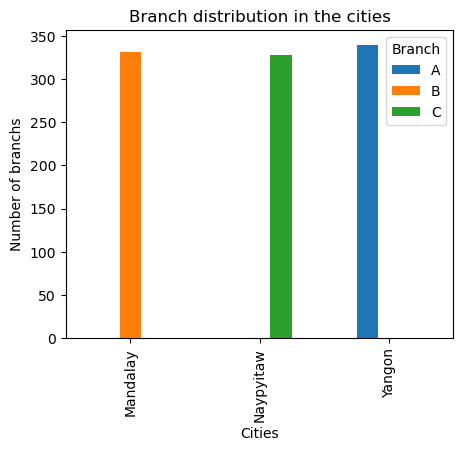

In [13]:
# Branch Distribution
branch_city = df.groupby(["City", "Branch"]).size().unstack(fill_value = 0)
print(branch_city)

branch_city.plot(kind='bar', figsize=(5, 4))
plt.title("Branch distribution in the cities")
plt.xlabel("Cities")
plt.ylabel("Number of branchs")
plt.legend(title="Branch")
plt.show()

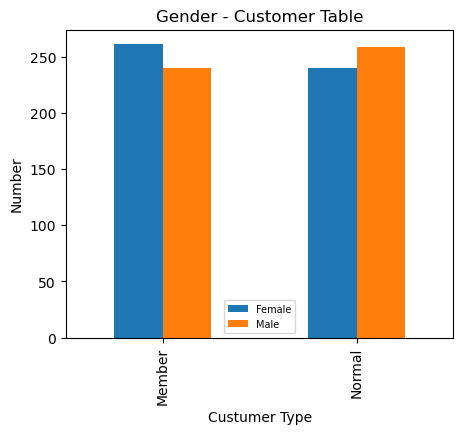

In [14]:
# Customer Gender (Normal vs Member)
gender_customer = df.groupby(["Customer type", "Gender"]).size().unstack(fill_value = 0)
gender_customer

gender_customer.plot(kind = "bar", figsize = (5,4))
plt.title("Gender - Customer Table")
plt.xlabel("Custumer Type")
plt.ylabel("Number")
plt.legend(loc = "best", fontsize = 7)
plt.show()

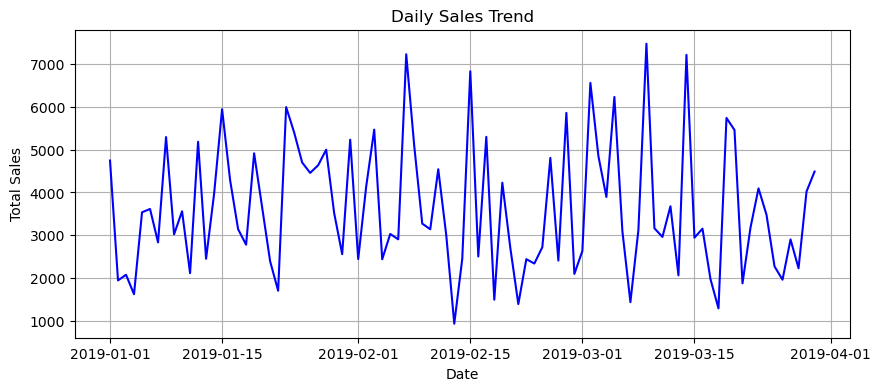

In [15]:
# Daily Sales Trend - Line Chart
df_line = df.copy()
df_line['Date'] = pd.to_datetime(df_line['Date'])
daily_sales = df_line.groupby(df_line['Date'].dt.date)['Total'].sum()

plt.figure(figsize=(10, 4))
daily_sales.plot(kind='line', color='blue')
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

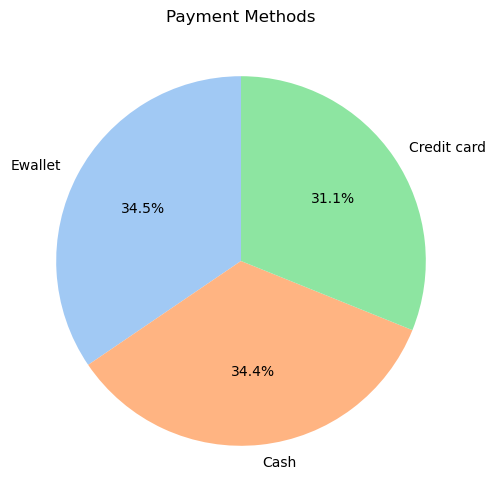

In [16]:
# Payment Distribution - Pie Chart
df['Payment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6,6), colors=sns.color_palette('pastel'))
plt.title("Payment Methods")
plt.ylabel('')
plt.show()

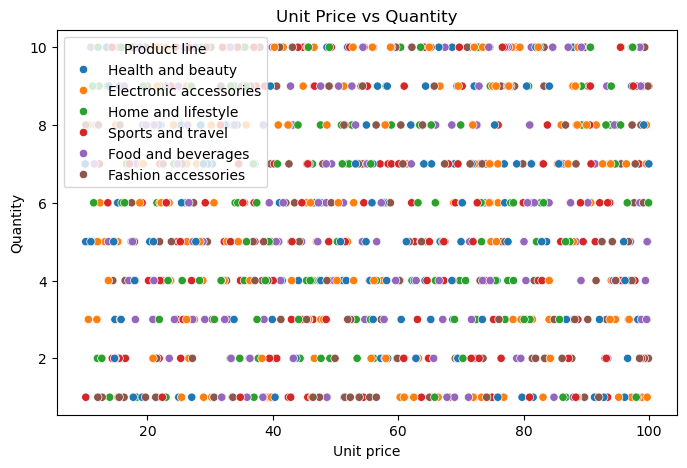

In [17]:
# Unit Price vs Quantity - Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Unit price', y='Quantity', data=df, hue='Product line', palette='tab10')
plt.title("Unit Price vs Quantity")
plt.show()

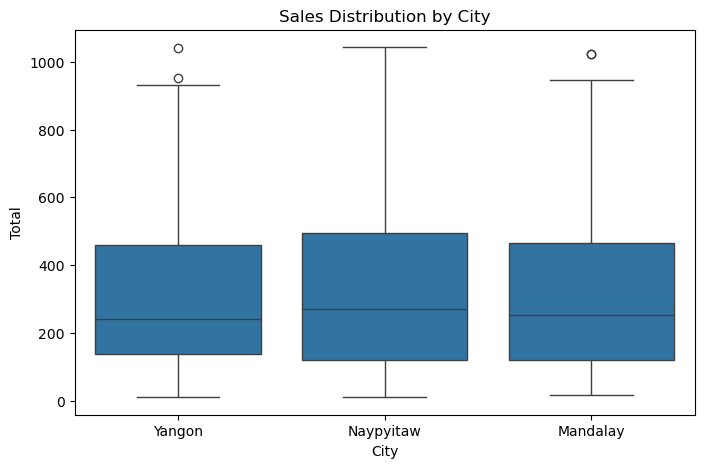

In [18]:
# Total by City - Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='City', y='Total', data=df)
plt.title("Sales Distribution by City")
plt.show()

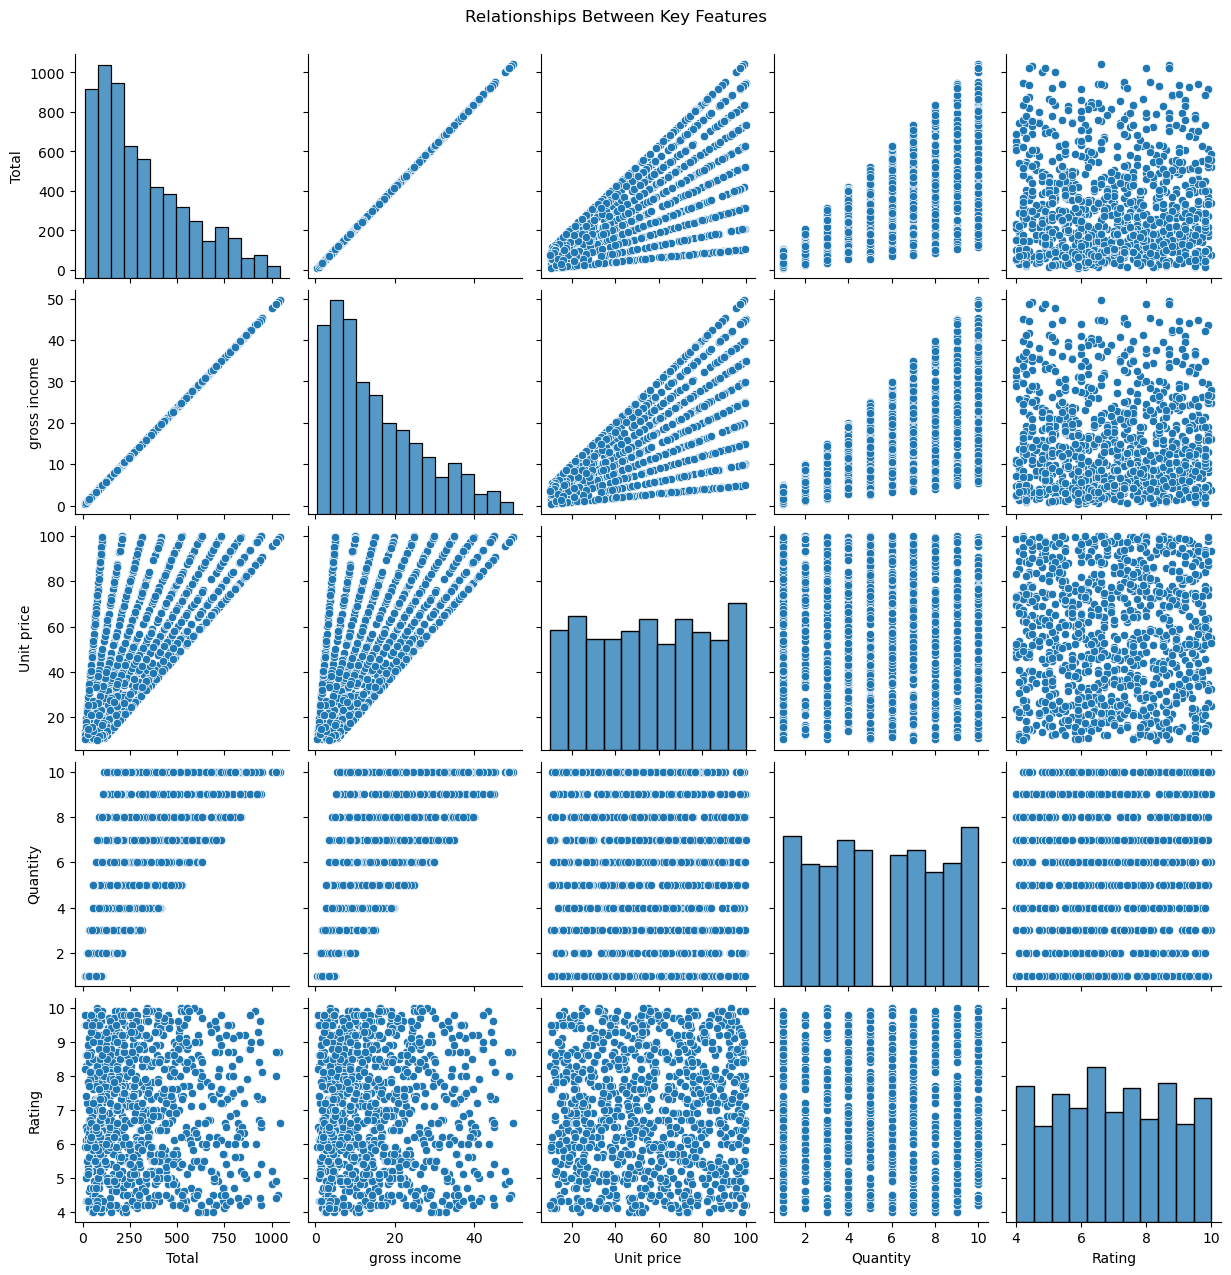

In [19]:
# Realtionship between Key Features Pairplot
sns.pairplot(df[['Total', 'gross income', 'Unit price', 'Quantity', 'Rating']])
plt.suptitle("Relationships Between Key Features", y=1.02)
plt.show()

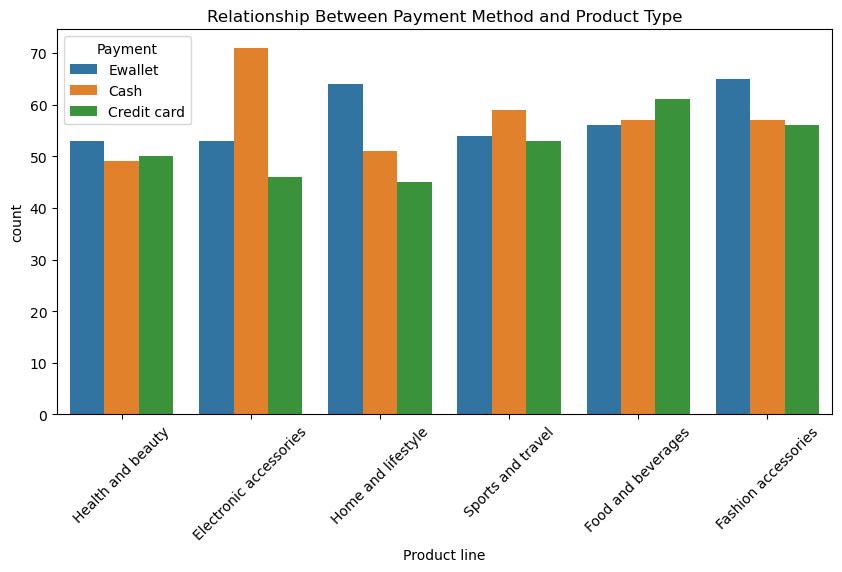

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Product line", hue="Payment", data=df)
plt.title("Relationship Between Payment Method and Product Type")
plt.xticks(rotation=45)
plt.show()

# FEATURE ENGINEERING (Date/Time) #

In [22]:
# Converting 'Date' and 'Time' columns to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df['Minute'] = pd.to_datetime(df['Time']).dt.minute

# Extracting day, month, year from Date
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Dropping original Date and Time columns
df.drop(columns=['Date', 'Time'], inplace=True)

In [23]:
df.head(2)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,Hour,Minute,Day,Month,Year
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,13,8,5,1,2019
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,10,29,8,3,2019


# ENCODING CATEGORICAL VARIABLES #

In [25]:
# Encoding Categorical Columns
cat_cols = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [26]:
# Calculating the minimum and maximum values for each column
min_values = df.min()
max_values = df.max()

print("Minimum values for each column:")
print(min_values)
print("\nMaximum values for each column:")
print(max_values)

Minimum values for each column:
Branch                        0.000000
City                          0.000000
Customer type                 0.000000
Gender                        0.000000
Product line                  0.000000
Unit price                   10.080000
Quantity                      1.000000
Tax 5%                        0.508500
Total                        10.678500
Payment                       0.000000
cogs                         10.170000
gross margin percentage       4.761905
gross income                  0.508500
Rating                        4.000000
Hour                         10.000000
Minute                        0.000000
Day                           1.000000
Month                         1.000000
Year                       2019.000000
dtype: float64

Maximum values for each column:
Branch                        2.000000
City                          2.000000
Customer type                 1.000000
Gender                        1.000000
Product line           

In [27]:
print(df.dtypes)

Branch                       int32
City                         int32
Customer type                int32
Gender                       int32
Product line                 int32
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Payment                      int32
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
Hour                         int32
Minute                       int32
Day                          int32
Month                        int32
Year                         int32
dtype: object


# MODEL TRAINING & EVALUATION #

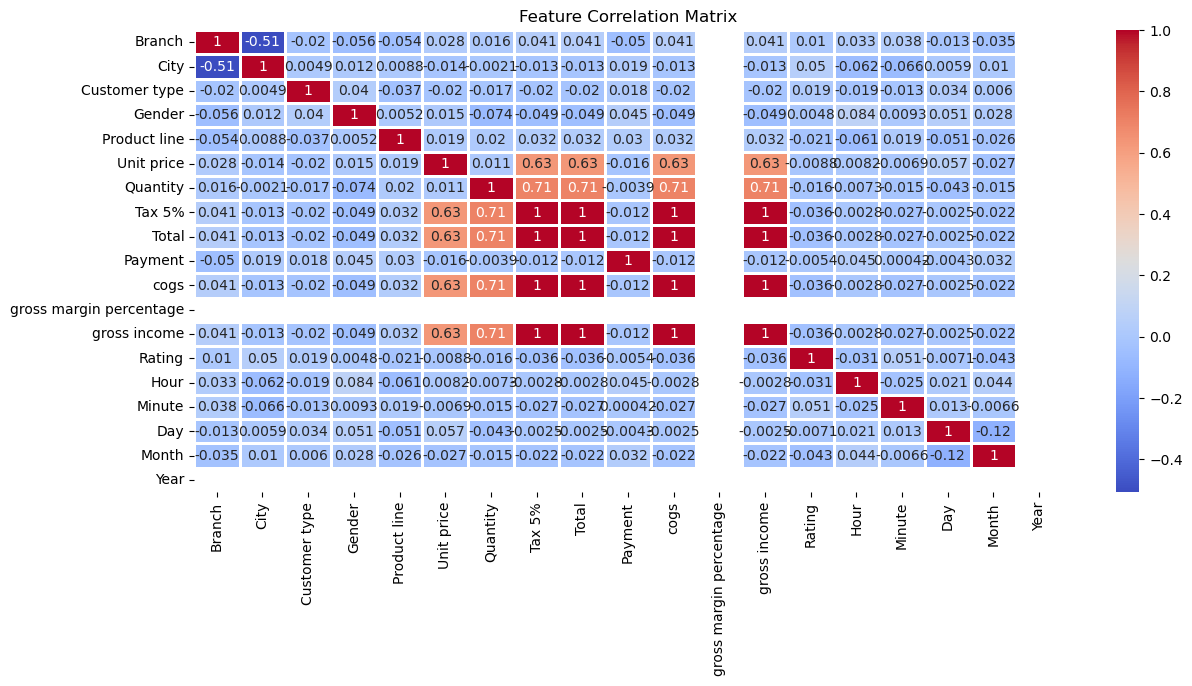

In [29]:
# Correlation Matrix - Heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=1)
plt.title("Feature Correlation Matrix")
plt.show()

**RANDOM FOREST REGRESSION**

In [31]:
# Target = 'Total'
X = df.drop(columns=['Total'])
y = df['Total']

In [32]:
# Train-Test Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Model Building
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [34]:
# Model Prediction
y_pred = rf.predict(X_test)

In [35]:
# Performance Metrices
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

R² Score: 1.0000
Mean Squared Error (MSE): 1.99
Root Mean Squared Error (RMSE): 1.41
Mean Absolute Error (MAE): 0.84


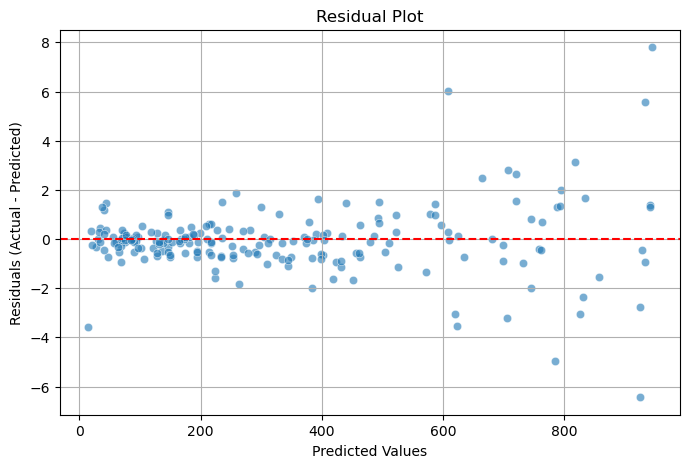

In [36]:
# Residual Plot
# Residual = Actual Value - Predicted Value
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.show()

In [37]:
# Comparing actual vs predicted on test set
predictions = rf.predict(X_test)

# Creating a comparison DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
# Viewing top 10 rows
print(comparison_df.head(10))  

       Actual   Predicted
521  523.9710  522.999435
737  616.9800  620.046315
740  408.7335  408.484755
660  135.3555  135.834090
411   45.9270   44.458155
678  618.9750  622.507935
626  127.8270  127.591800
513  731.6925  732.680340
859  450.1035  451.790325
136  138.1275  138.170550


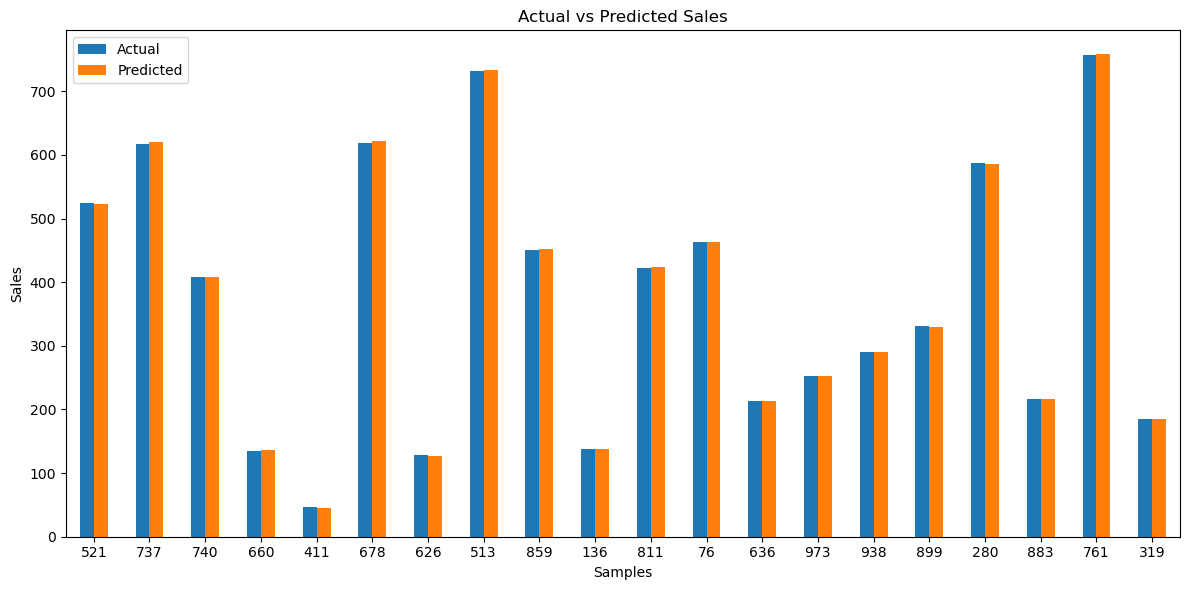

In [38]:
# Bar plot to visualize actual vs predicted
comparison_df.head(20).plot(kind='bar', figsize=(12,6))
plt.title("Actual vs Predicted Sales")
plt.xlabel("Samples")
plt.ylabel("Sales")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**MANUAL PREDICTION**

In [40]:
# Prediction using User Input
sample = {
    'Branch': 0,
    'City': 2,
    'Customer type': 1,
    'Gender': 1,
    'Product line': 4,
    'Unit price': 80.0,
    'Quantity': 5,
    'Tax 5%': 20.0,
    'Payment': 0,
    'cogs': 400.0,
    'gross margin percentage': 4.76,
    'gross income': 20.0,
    'Rating': 8.0,
    'Hour': 14,
    'Minute': 30,
    'Day': 15,
    'Month': 2,
    'Year': 2019
}

final_features = [
    'Branch', 'City', 'Customer type', 'Gender', 'Product line',
    'Unit price', 'Quantity', 'Tax 5%', 'Payment', 'cogs',
    'gross margin percentage', 'gross income', 'Rating',
    'Hour', 'Minute', 'Day', 'Month', 'Year'
]

# Creating sample DataFrame and reordering columns
sample_df = pd.DataFrame([sample])
sample_df = sample_df[final_features]

# Making Final prediction
prediction = rf.predict(sample_df)
print(f"Predicted Total Sale Amount: ₹{prediction[0]:.2f}")

Predicted Total Sale Amount: ₹420.06
